In [3]:
RIF = RealIntervalField()

## Proof of Lemma 2.2
We verify that the following inequality holds in the interval $x \in [-2\sqrt{2},2\sqrt{2}]$.
$$x + 0.2456 (x^2-4) + 0.0887 (x^3-6x) + 0.0295 (x^4-8x+8) \geq 1.1691 - 1.9169 \log (3-x),$$

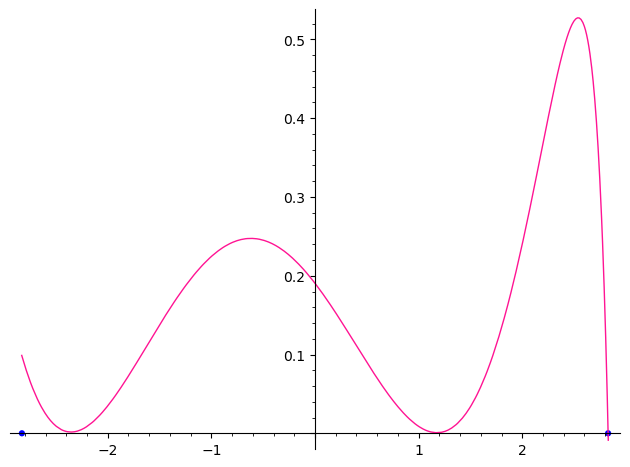

In [43]:
var('x')
F(x) = x + 0.2456*(x^2-4) + 0.0887*(x^3-6*x) + 0.0295*(x^4-8*x^2+8)-1.1691+1.9169*log(3-x)
plot(F(x), (x, -2.83, 2.83), color='deeppink') + point([(-2*sqrt(2), 0), (2*sqrt(2), 0)], size=20, color='blue')

In [44]:
def eval_rigor(c):
    P.<t> = RIF[]
    if (3 - c).lower() <= 0:  # Check if the lower bound of c makes log undefined
        raise ValueError("Input c is out of domain for log(3-t). Ensure c < 3.")
    F = t + RIF(0.2456)*(t^2-4) + RIF(0.0887)*(t^3-6*t) + RIF(0.0295)*(t^4-8*t^2+8) - RIF(1.1691) + RIF(1.9169)*log(3-t)
    return F.subs(t=c)

Positive at the endpoints.

In [50]:
eval_rigor(RIF(-sqrt(8))),  eval_rigor(RIF(sqrt(8)))

(0.09811996123936?, 0.00048003876064?)

In [45]:
F.derivative()

x |--> 0.118000000000000*x^3 + 0.266100000000000*x^2 + 0.0192000000000001*x + 1.91690000000000/(x - 3) + 0.467800000000000

$F'(x) = p(x) + c/(x-3)$, so we have that $F'(x) = 0$ if and only if $(x-3)p(x) + c = 0$.

In [7]:
P.<t> = RR[]
g = (t - 3)*(0.118000000000000*t^3 + 0.266100000000000*t^2 + 0.0192000000000001*t + 0.467800000000000) + 1.91690000000000
l = g.roots()
l

[(-2.35383901848490, 1),
 (-0.618343227622023, 1),
 (1.17712740616477, 1),
 (2.53997009417945, 1)]

We check that $(x-3)p(x)+c$ has a sign change within $0.00001$ of each of the reported roots. This confirms rigorously that the actual roots are within these neighborhoods.


In [16]:
PI.<ti> = RIF[]
gi = (ti - 3)*(RIF(0.1180)*ti^3 + RIF(0.2661)*ti^2 + RIF(0.0192)*ti + RIF(0.4678)) + RIF(1.91690)
[(gi.subs(ti=RIF(c-0.00001)), gi.subs(ti=RIF(c+0.00001))) for c, _ in l]

[(0.00003538757519?, -0.00003538682233?),
 (-0.000011612891863?, 0.000011612822795?),
 (0.000010195280241?, -0.000010195301938?),
 (-0.00002485561561?, 0.00002485623936?)]

We verify that $F(x)$ is positive in neighborhoods of the critical points. 

In [61]:
[eval_rigor(RIF(c-0.00001, c+0.00001)) for (c, _) in l]

[0.0016?, 0.2475?, 0.0007?, 0.528?]